In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path.insert(1, './PY')
import dkl_utils
import dkl_score
import dkl_artist

0.8.0


# Load 10x genomics sample data
- Sample specific $D_{KL}$ value plots

In [3]:
# 10x Genomics public data
# Product : Single Cell Immune Profiling
# Project : Chromium X Series 3' Demonstration (v3.1 Chemistry)
# Data : 10k Human PBMCs, 3' v3.1, Chromium Controller
# Download : Feature / cell matrix (raw)
# Location : /DKL_PAPER/DATA/PBMC_10x/
# wget https://cf.10xgenomics.com/samples/cell-vdj/6.1.0/10k_PBMC_5pv2_nextgem_Chromium_Controller_Multiplex/10k_PBMC_5pv2_nextgem_Chromium_Controller_Multiplex_count_raw_feature_bc_matrix.tar.gz
# tar -zxvf 10k_PBMC_5pv2_nextgem_Chromium_Controller_Multiplex_count_raw_feature_bc_matrix.tar.gz

# Then, move downloaded filte to "./DATA/PBMC_10x/"

temp_in_dir = "./DATA/PBMC_10x/raw_feature_bc_matrix/"
temp_out_dir = "./out/"

In [4]:
##############################
#Bin size setting
bin_size = 20
readme = ""

In [5]:
count_df, cpm_df, log_cpm_df, readme_app = dkl_utils.read_10x_data(temp_in_dir,temp_out_dir, norm_this=True)
print(readme_app)
count_df

/data1/home/histidine/miniconda3/envs/scGSEA/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


3818	19869
[Fitering]
Filter out cells without under 200 genes greater than 2500
Filter out cells over mitochondrial percentage 5%
Filter out genes not within at least 3 cells
Before FilteringCell :540465, Gene :36601
After FilteringCell :3818, Gene :19869




,AL627309.1,AL627309.5,LINC01409,LINC01128,LINC00115,FAM41C,NOC2L,KLHL17,PLEKHN1,AL645608.7,...,BX004987.1,AC145212.1,MAFIP,AL354822.1,AL592183.1,AC240274.1,AC233755.2,AC233755.1,AC007325.1,AC007325.4
AAACCTGAGTGGAGAA-1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCACCCATTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCAGCGAACA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGGTAAGTAGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGGTACTCGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACACCGGAAA-1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCACAGCCTATA-1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCACATGCCCGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCATTTGGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Load Housekeeping Gene(HKG)
# Eisenberg, Eli, and Erez Y. Levanon. "Human housekeeping genes, revisited." TRENDS in Genetics 29.10 (2013): 569-574.
hkg_gene_list = dkl_utils.get_hkg_gene_list()

#Load human Stably Expressed Gene (hSEG)
# Lin, Yingxin, et al. "Evaluating stably expressed genes in single cells." GigaScience 8.9 (2019): giz106.
hseg_gene_list = dkl_utils.get_hseg_gene_list()


# Main $D_{KL}$ value plots with the 10x genomics dataset

In [7]:
temp_dkl_obj = dkl_score.dkl_analysis(count_df.T)
df_origin = temp_dkl_obj.get_df()
temp_dkl_obj.calc_score()
temp_info_df = temp_dkl_obj.get_info_df()
temp_info_df
#Add zero rate

[QC] Input data shape: Cells : 3818 , Genes : 19869
[QC] Zero filtered data shape: Cells : 3818 , Genes : 19190
[Sort] Sorted genes with total gene count descending order
[Sort] Sorted cells with total cell count descending order
[Scoring] Finished scoring of genes!



,Dkl,entropy,cross_entropy,tot_count,mean,var,std,zero_rate
MALAT1,0.142745,8.072350,8.215095,405855.0,106.300423,3632.297607,60.268547,0.004453
EEF1A1,0.057517,8.112154,8.169671,315624.0,82.667366,1637.517456,40.466251,0.007334
RPL41,0.035390,8.149532,8.184922,256618.0,67.212677,791.029175,28.125240,0.006548
RPS12,0.067479,8.116343,8.183821,244202.0,63.960712,936.255127,30.598286,0.008381
RPL10,0.053732,8.129740,8.183472,236343.0,61.902306,800.759705,28.297697,0.006810
...,...,...,...,...,...,...,...,...
HOXA4,7.960597,0.000000,7.960597,1.0,0.000262,0.000262,0.016182,0.999738
HOXA10-AS,8.460110,0.000000,8.460110,1.0,0.000262,0.000262,0.016182,0.999738
AC004593.3,8.272180,0.000000,8.272180,1.0,0.000262,0.000262,0.016182,0.999738
AC008753.2,8.665416,0.000000,8.665416,1.0,0.000262,0.000262,0.016182,0.999738


In [8]:
temp_artist = dkl_artist.dkl_artist(temp_dkl_obj,bin_size,temp_in_dir, temp_out_dir)

use_hkg_list = temp_artist.is_use_gene_list(hkg_gene_list)
print(str(len(use_hkg_list)) + " / " + str(len(hkg_gene_list)))
gene_list_str1 = "HKG"# (" + str(len(use_hkg_list)) + " / " + str(len(hkg_gene_list)) + ")"

use_hseg_list = temp_artist.is_use_gene_list(hseg_gene_list)
print(str(len(use_hseg_list)))
gene_list_str2 = "hSEG"# (" + str(len(use_hseg_list)) + " / " + str(len(hseg_gene_list)) + ")"

3554 / 3804
1011


1011 / 1076


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


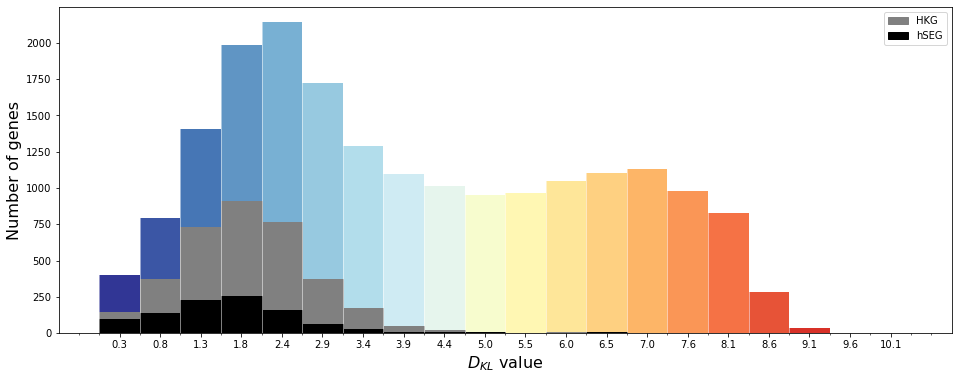

In [9]:
print(str(len(use_hseg_list)) + " / " + str(len(hseg_gene_list)))

temp_artist.gene_list2_bin_plot(use_hkg_list, gene_list2 = use_hseg_list, gene_type=gene_list_str1, gene_type2=gene_list_str2)
plt.savefig("./RESULT/FIGURES/pbmc_10x_main.pdf", format="pdf", bbox_inches="tight")
plt.savefig("./RESULT/FIGURES/pbmc_10x_main.png", bbox_inches="tight")

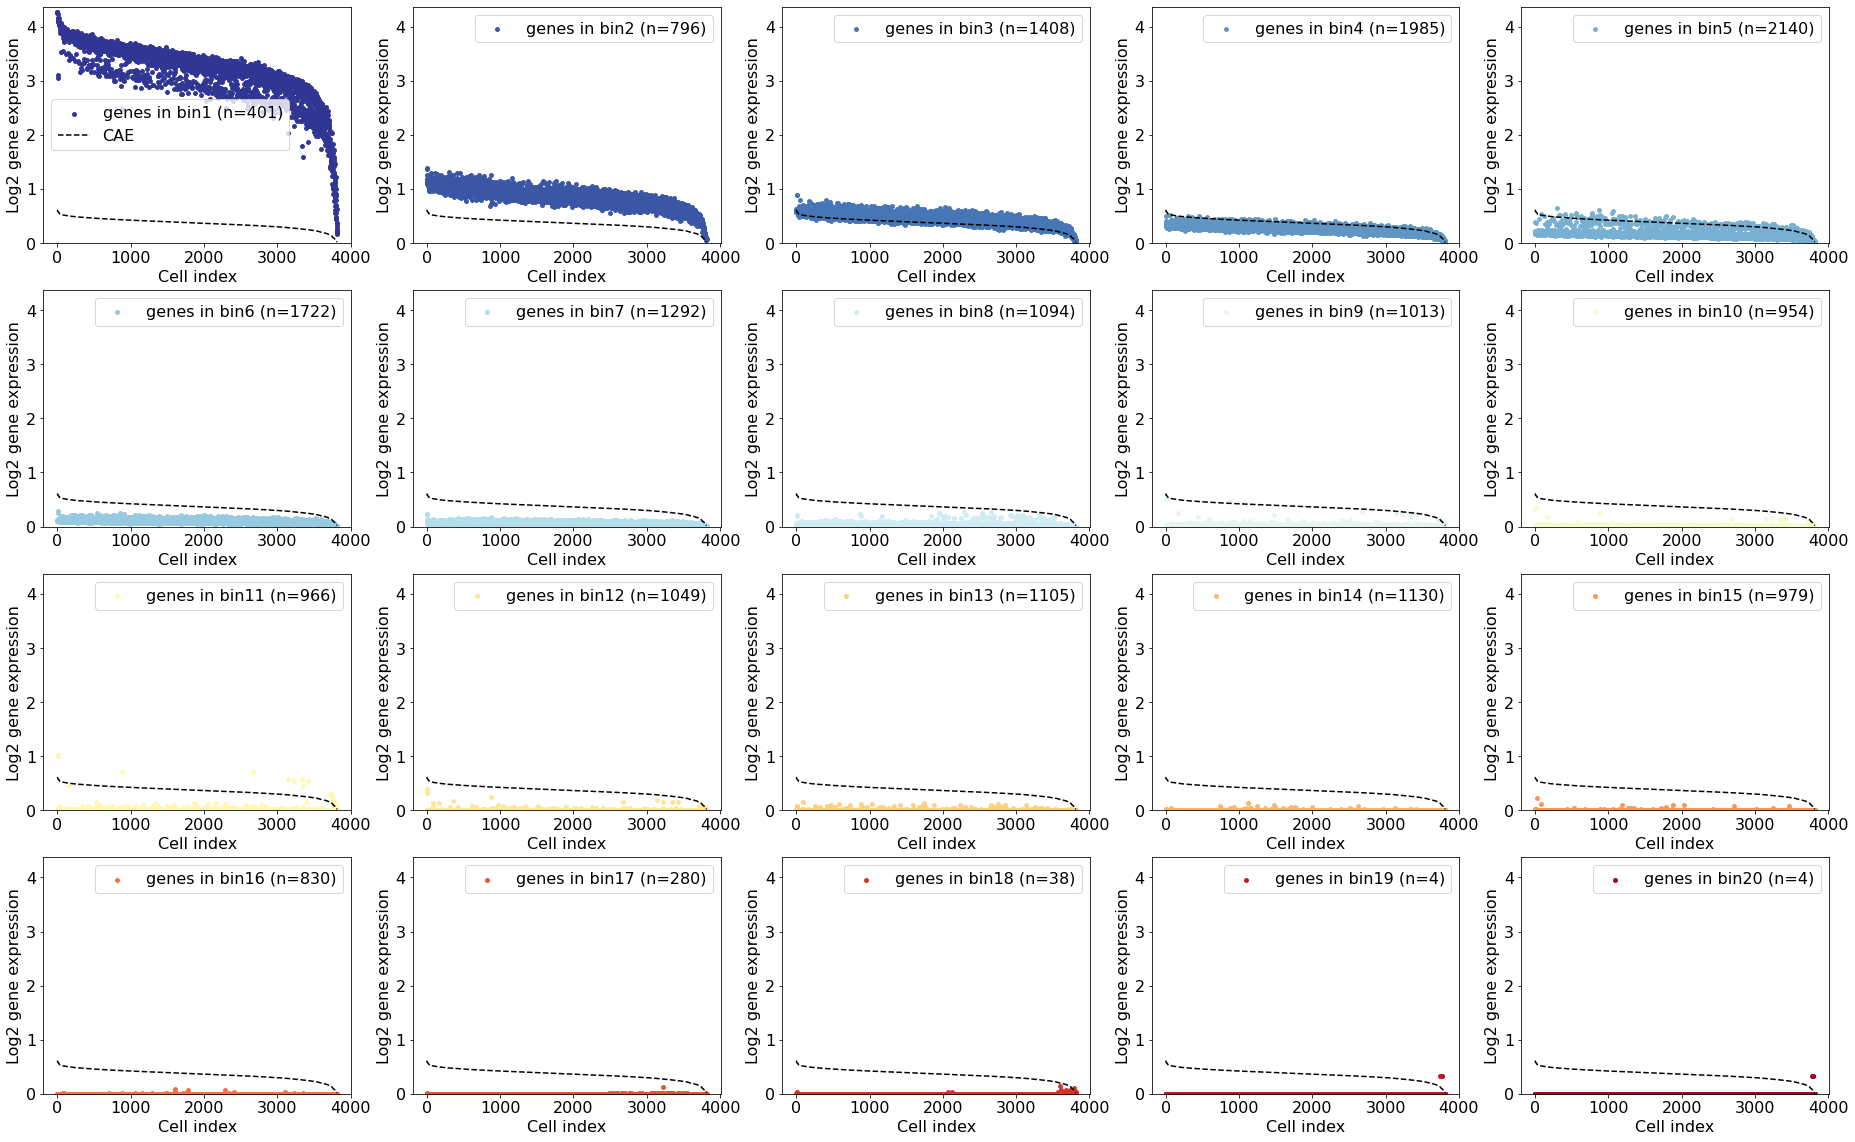

In [10]:
temp_artist.expression_pattern_main()
plt.savefig("./RESULT/FIGURES/pbmc_10x_main_pattern.pdf", format="pdf", bbox_inches="tight")
plt.savefig("./RESULT/FIGURES/pbmc_10x_main_pattern.png", bbox_inches="tight")

# Load precomputed $D_{KL}$ values df for comparing two cohorts 
## Severe vs Healthy

In [11]:
batch_all_dir = "./RESULT/"
GSE161918 = "GSE161918_count_dkl_full_results.tsv"

In [12]:
GSE161918_df = pd.read_csv(batch_all_dir+ GSE161918 ,sep="\t",index_col = 0)
GSE161918_df

,left,right,HKG,hSEG,left_not_HKG,project,Study Subject ID,Sample ID,Blood draw time point,Who Ordinal Scale,Sex,Class,Age,Batch,Severity,cell,gene
1,2.438786,5.804810,2.200967,1.890179,2.604162,B2_HGR0000042_HTO3,HGR0000042,BS-EQ-0015,T0,5,M,COVID,53,B2,Severe,3404,16045
2,2.579250,6.159186,2.325090,1.997741,2.748104,B2_HGR0000069_HTO1,HGR0000069,BS-EQ-0001,T1,5,M,COVID,54,B2,Severe,5389,16585
3,2.599012,6.118554,2.348074,1.977738,2.777928,B2_HGR0000069_HTO2,HGR0000069,BS-EQ-0001,T0,5,M,COVID,54,B2,Severe,5731,16241
6,2.488161,6.146608,2.205230,1.899018,2.671915,B2_HGR0000092_HTO3,HGR0000092,BS-EQ-0012,T1,5,M,COVID,45,B2,Severe,4769,16644
7,2.469579,5.791136,2.255741,1.905175,2.631185,B2_HGR0000094_HTO2,HGR0000094,BS-EQ-0007,T0,5,M,COVID,61,B2,Severe,3518,15852
8,2.362344,5.278053,2.245070,1.907814,2.487367,B2_HGR0000094_HTO3,HGR0000094,BS-EQ-0007,T1,5,M,COVID,61,B2,Severe,1822,14786
9,2.607730,6.284178,2.301285,1.919674,2.803488,B2_HGR0000115_HTO2,HGR0000115,BS-EQ-0032,T1,5,M,COVID,24,B2,Severe,6866,16702
10,2.663923,6.689300,2.283675,1.911175,2.863519,B2_HGR0000124_HTO2,HGR0000124,BS-EQ-0021,T0,5,M,COVID,79,B2,Severe,9974,18041
11,2.454934,6.041788,2.189377,1.817506,2.627872,B2_HGR0000124_HTO3,HGR0000124,BS-EQ-0021,T1,5,M,COVID,79,B2,Severe,3974,16365
14,2.588957,6.360474,2.257918,1.900904,2.780624,B2_HGR0000391_HTO1,HGR0000391,BS-EQ-0029,T0,5,M,COVID,66,B2,Severe,7162,17085


In [13]:
# Load precomputed sample specific gene stability data
GSE161918_p_list = GSE161918_df['project'].to_list()
GSE161918_s_list = GSE161918_df['Severity'].to_list()
print(len(GSE161918_p_list))
all_scores, all_score_df, all_percent_nan_df, befroe_filtering_df = dkl_score.get_mean_scores(GSE161918_p_list, "./RESULT/GSE161918_B2/")
all_score_df

14


,B2_HGR0000042_HTO3,B2_HGR0000069_HTO1,B2_HGR0000069_HTO2,B2_HGR0000092_HTO3,B2_HGR0000094_HTO2,B2_HGR0000094_HTO3,B2_HGR0000115_HTO2,B2_HGR0000124_HTO2,B2_HGR0000124_HTO3,B2_HGR0000391_HTO1,B2_HGR0000418_HTO1,B2_SHD2_HTO3,B2_SHD4_HTO1,B2_SHD7_HTO2
MALAT1,0.165905,0.238690,0.145502,0.227971,0.147096,0.202952,0.135830,0.160069,0.148199,0.140888,0.105596,0.096024,0.104557,0.109030
EEF1A1,0.097680,0.081851,0.087691,0.078143,0.095014,0.089918,0.059796,0.091180,0.088208,0.123029,0.085849,0.059956,0.075552,0.056035
B2M,0.119833,0.101644,0.103354,0.109287,0.094178,0.083537,0.071061,0.095310,0.092020,0.079385,0.072665,0.054447,0.071182,0.082285
RPL41,0.054905,0.064817,0.067074,0.062634,0.070008,0.063740,0.043625,0.074374,0.068163,0.075192,0.047891,0.047415,0.057068,0.050070
RPL10,0.076112,0.071164,0.088213,0.053435,0.090787,0.072855,0.047466,0.090277,0.084256,0.103820,0.063267,0.053374,0.066685,0.056518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RP11-1391J7.1,7.588545,7.371783,6.929594,6.954356,6.534950,6.057681,7.193288,7.059541,7.272130,7.160821,6.940919,7.396891,9.083969,7.072385
RP5-1086K13.1,8.044029,8.010181,8.173909,6.158852,7.390131,5.875927,7.622887,7.186248,7.734893,7.007668,6.792611,8.746151,6.824122,6.855025
RP11-496I9.1,7.946098,6.180336,6.108402,7.237121,7.782565,6.964213,6.367133,6.180915,6.623520,6.519469,6.785972,5.176883,6.280439,7.600473
DOCK1,7.535949,6.352772,7.130491,6.232413,7.574630,5.889989,7.090474,6.722613,7.211420,6.487117,7.286619,6.955192,7.156731,9.008869


In [14]:
# Divide Dataset
all_score_df = all_score_df.T
all_score_df['severity'] = GSE161918_s_list

severe_p_list = all_score_df[all_score_df['severity']=="Severe"].index.to_list()
print("Number of Severe Cohort Patients :", len(severe_p_list))

hc_p_list = all_score_df[all_score_df['severity']=="HC"].index.to_list()
print("Number of Healthy Cohort Patients :", len(hc_p_list))

Number of Severe Cohort Patients : 11
Number of Healthy Cohort Patients : 3


In [15]:
# Statistically Differentially Stable Gene
severe_hc_gene_gap, corrected_p_val = dkl_score.compare_two_groups(all_score_df,severe_p_list,hc_p_list, filter_pval = 0.05, fdr_bh=True)
print(corrected_p_val)

[0.06479679 0.09937483 0.183024   ... 0.71591635 0.56305631 0.56305631]


In [16]:
severe_hc_gene_gap.to_csv("./RESULT/GSE161918_B2_HC_SEVERE_GENE.csv", sep="\t")
severe_hc_gene_gap

,pvalue,U,case_mean,case_std,control_mean,control_std,gap,absolute_gap,rejected_pval,adjusted_pval
LMAN2,0.005495,33.0,1.236163,0.084812,1.001667,0.007647,0.234496,0.234496,True,0.043469
TBL1XR1,0.005495,33.0,2.626072,0.104262,2.315457,0.084748,0.310615,0.310615,True,0.043469
FCRL1,0.005495,0.0,3.311129,0.383302,3.960448,0.029226,-0.649319,0.649319,True,0.043469
TANGO2,0.005495,33.0,2.712737,0.134862,2.522416,0.009995,0.190321,0.190321,True,0.043469
TACO1,0.005495,0.0,2.452101,0.177484,3.104806,0.077862,-0.652705,0.652705,True,0.043469
...,...,...,...,...,...,...,...,...,...,...
PARVB,1.000000,17.0,2.416882,0.536651,2.332047,0.088545,0.084835,0.084835,True,0.043469
ZNF226,1.000000,17.0,3.194997,0.170943,3.180385,0.076449,0.014611,0.014611,True,0.043469
NPIPB3,1.000000,17.0,3.382607,0.186823,3.343481,0.137112,0.039125,0.039125,True,0.043469
RP11-671J11.4,1.000000,16.0,6.290154,0.593515,6.645453,0.976601,-0.355299,0.355299,True,0.043469


In [17]:
# Condition Specific Variable Genes
severe_hc_gene_gap[severe_hc_gene_gap['gap']>0]

,pvalue,U,case_mean,case_std,control_mean,control_std,gap,absolute_gap,rejected_pval,adjusted_pval
LMAN2,0.005495,33.0,1.236163,0.084812,1.001667,0.007647,0.234496,0.234496,True,0.043469
TBL1XR1,0.005495,33.0,2.626072,0.104262,2.315457,0.084748,0.310615,0.310615,True,0.043469
TANGO2,0.005495,33.0,2.712737,0.134862,2.522416,0.009995,0.190321,0.190321,True,0.043469
DDX10,0.005495,33.0,2.914391,0.167859,2.543173,0.041243,0.371219,0.371219,True,0.043469
ABHD3,0.005495,33.0,2.682617,0.107171,2.250390,0.061045,0.432227,0.432227,True,0.043469
...,...,...,...,...,...,...,...,...,...,...
ZNF502,1.000000,17.0,5.008448,0.409172,4.976018,0.286073,0.032430,0.032430,True,0.043469
PAG1,1.000000,17.0,1.308402,0.149154,1.293403,0.126437,0.014999,0.014999,True,0.043469
PARVB,1.000000,17.0,2.416882,0.536651,2.332047,0.088545,0.084835,0.084835,True,0.043469
ZNF226,1.000000,17.0,3.194997,0.170943,3.180385,0.076449,0.014611,0.014611,True,0.043469


In [18]:
# Condition Specific Stable Genes
severe_hc_gene_gap[severe_hc_gene_gap['gap']<0]

,pvalue,U,case_mean,case_std,control_mean,control_std,gap,absolute_gap,rejected_pval,adjusted_pval
FCRL1,0.005495,0.0,3.311129,0.383302,3.960448,0.029226,-0.649319,0.649319,True,0.043469
TACO1,0.005495,0.0,2.452101,0.177484,3.104806,0.077862,-0.652705,0.652705,True,0.043469
ZNF3,0.005495,0.0,2.792732,0.130319,3.204748,0.041818,-0.412016,0.412016,True,0.043469
RBM27,0.005495,0.0,1.232659,0.058562,1.410173,0.031610,-0.177514,0.177514,True,0.043469
ARFGEF2,0.005495,0.0,2.334969,0.103482,2.527462,0.016164,-0.192493,0.192493,True,0.043469
...,...,...,...,...,...,...,...,...,...,...
PSMA8,1.000000,16.0,5.578616,0.494002,5.609719,0.414003,-0.031103,0.031103,True,0.043469
FSD1,1.000000,16.0,5.350673,0.688360,5.496947,0.136906,-0.146275,0.146275,True,0.043469
NSF,1.000000,16.0,2.414952,0.395525,2.482574,0.168679,-0.067622,0.067622,True,0.043469
RP11-671J11.4,1.000000,16.0,6.290154,0.593515,6.645453,0.976601,-0.355299,0.355299,True,0.043469


# Grpofiler Result of Condition Specific Variable Genes

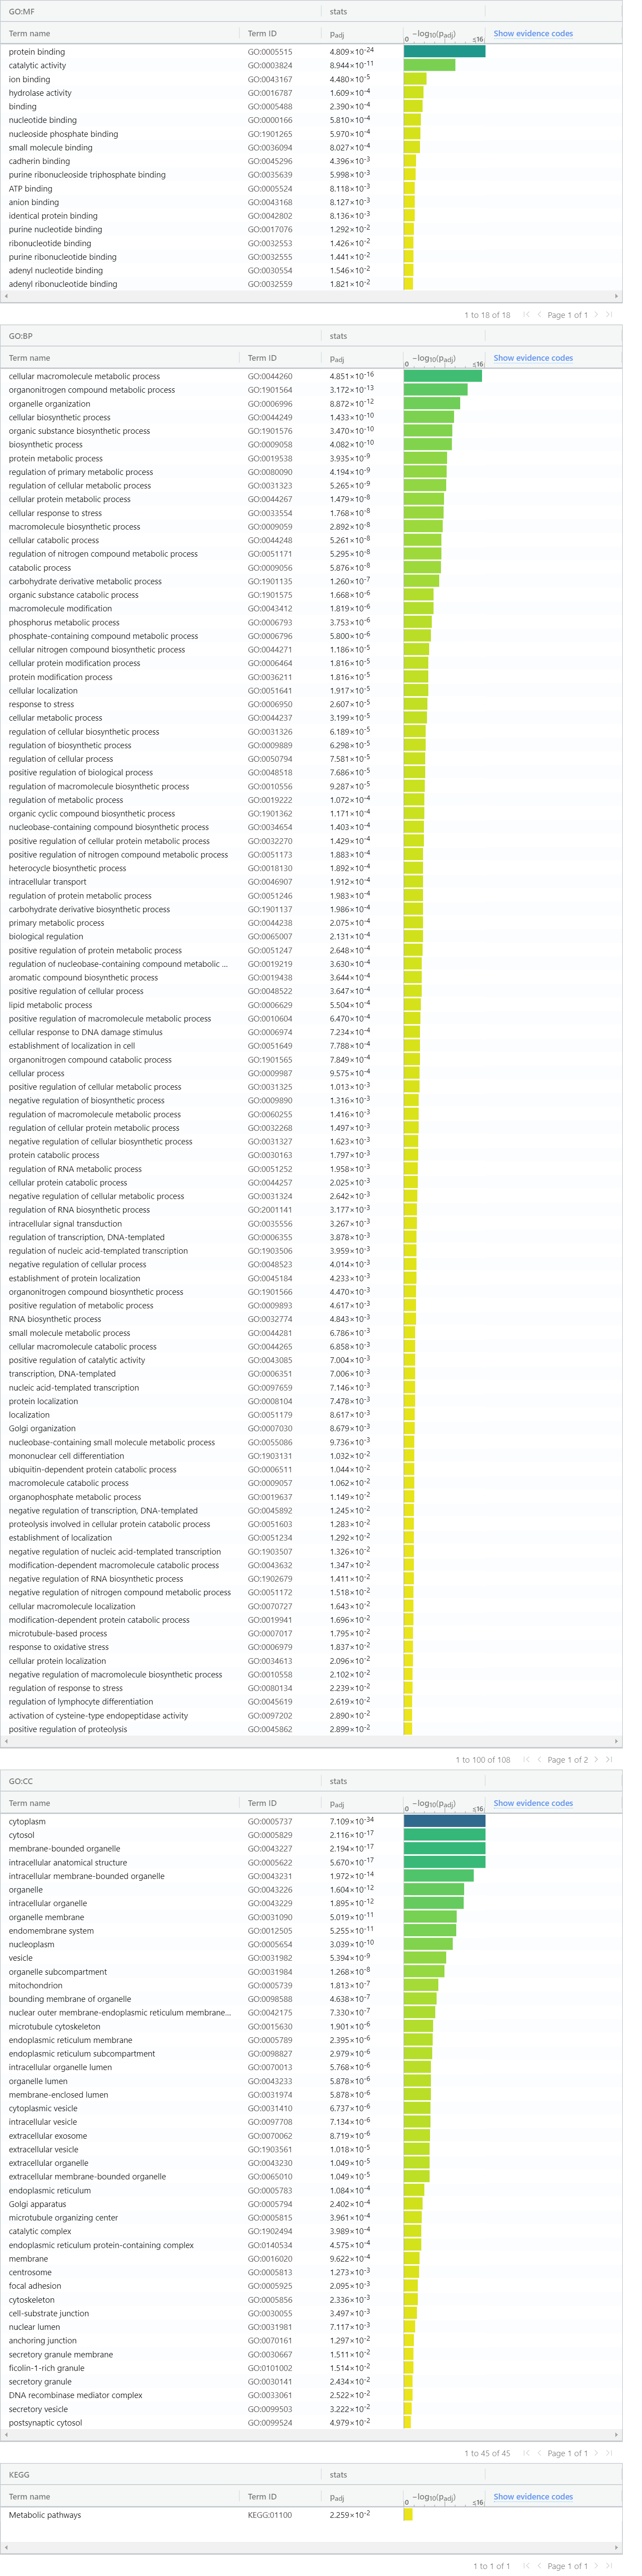

In [19]:
from IPython.display import Image, display
display(Image(filename="./RESULT/gprofiler/gProfiler_condition_specific_variable_upzero_genes.png"))

# Grpofiler Result of Condition Specific Stable Genes

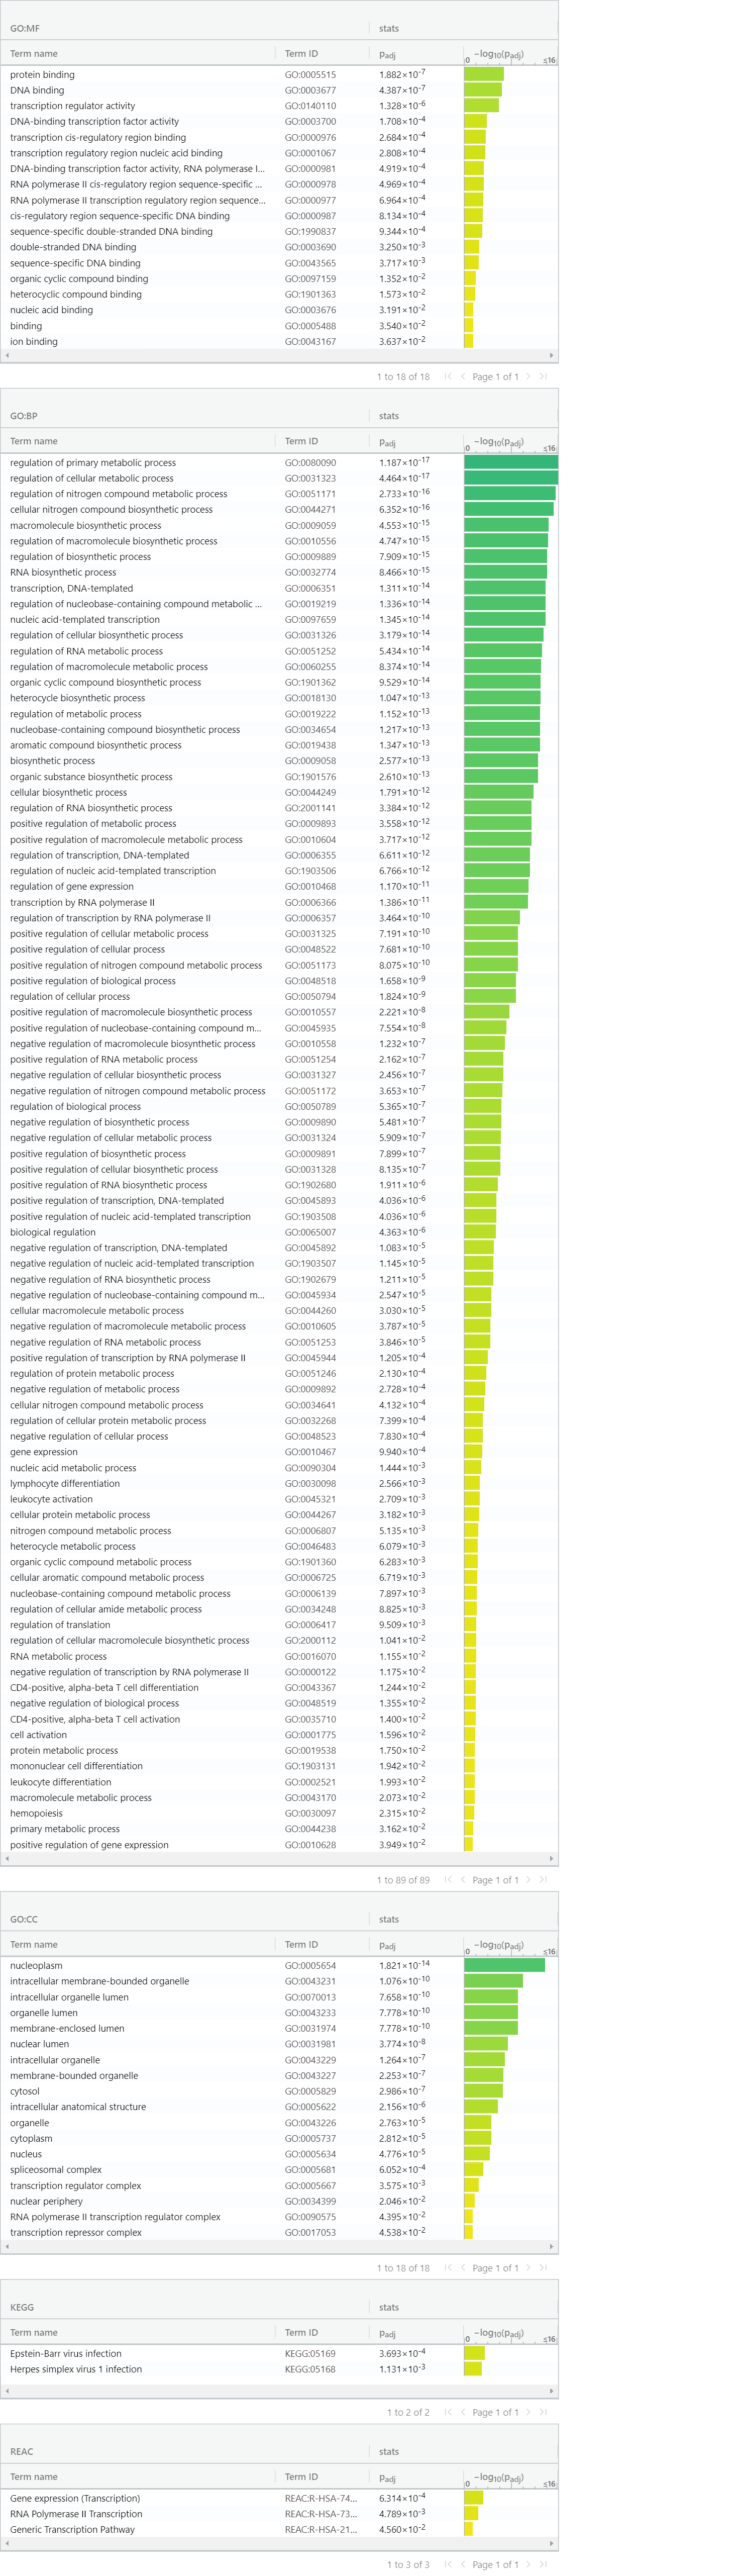

In [20]:
from IPython.display import Image, display
display(Image(filename="./RESULT/gprofiler/gProfiler_condition_specific_stable_downzero_genes.png"))